# What are the timelines of these tweets? Do you see significant peaks and valleys?
#### Do you see any data collection gaps?
#### Plot the timelines of these tweets

In [1]:
tweets_spark = spark.read.parquet('gs://' + 'msca-bdp-students-bucket' + '/shared_data/sanchit/tweets_parquet_original_col_filtered')


In [2]:
tweets_spark.columns
#confirmation

['created_at',
 'statuses_count',
 'retweeted',
 'text',
 'user_id',
 'username',
 'user_desc',
 'followers_count',
 'location',
 'verified_user']

In [3]:
spark.conf.set("spark.sql.repl.eagerEval.enabled",True)

In [4]:
import pandas as pd
import numpy as np
pd.set_option('display.max_colwidth', None)
pd.reset_option('display.max_rows')
from itertools import compress 
from pyspark.sql.functions import *
from pyspark.sql.types import *
import seaborn as sns
import matplotlib.pyplot as plt
warnings.filterwarnings(action='ignore')
warnings.simplefilter('ignore')

In [5]:
from pyspark.sql import functions as F


In [6]:
from pyspark.sql.functions import to_timestamp, from_unixtime, unix_timestamp, to_date, year, udf, explode, split, col, length, rank, dense_rank, avg, sum


In [7]:
spark.conf.set("spark.sql.legacy.timeParserPolicy","LEGACY")

In [8]:
date_df = tweets_spark.select('created_at', to_timestamp('created_at', 'EEE MMM d HH:mm:ss z yyyy').alias('date'))

date_df

created_at,date
Mon Aug 29 21:16:...,2022-08-29 21:16:14
Mon Aug 29 21:16:...,2022-08-29 21:16:16
Mon Aug 29 21:16:...,2022-08-29 21:16:16
Mon Aug 29 21:16:...,2022-08-29 21:16:17
Mon Aug 29 21:16:...,2022-08-29 21:16:24
Mon Aug 29 21:16:...,2022-08-29 21:16:24
Mon Aug 29 21:16:...,2022-08-29 21:16:25
Mon Aug 29 21:16:...,2022-08-29 21:16:27
Mon Aug 29 21:16:...,2022-08-29 21:16:31
Mon Aug 29 21:16:...,2022-08-29 21:16:39


In [9]:
date_df_pd = date_df.toPandas()

In [10]:
date_df_pd['date'].min()

Timestamp('2022-04-05 04:21:37')

In [11]:
date_df_pd['date'].max()

Timestamp('2022-11-06 22:53:09')

In [17]:
date_df_pd[date_df_pd['date']. isnull()]
#no null values / missing gaps in data

,created_at,date


In [12]:
tweet_df_5min = date_df_pd.groupby(pd.Grouper(key='date', freq='5Min', convention='start')).size()

In [16]:
tweet_df_1day = date_df_pd.groupby(pd.Grouper(key='date', freq='1D', convention='start')).size()

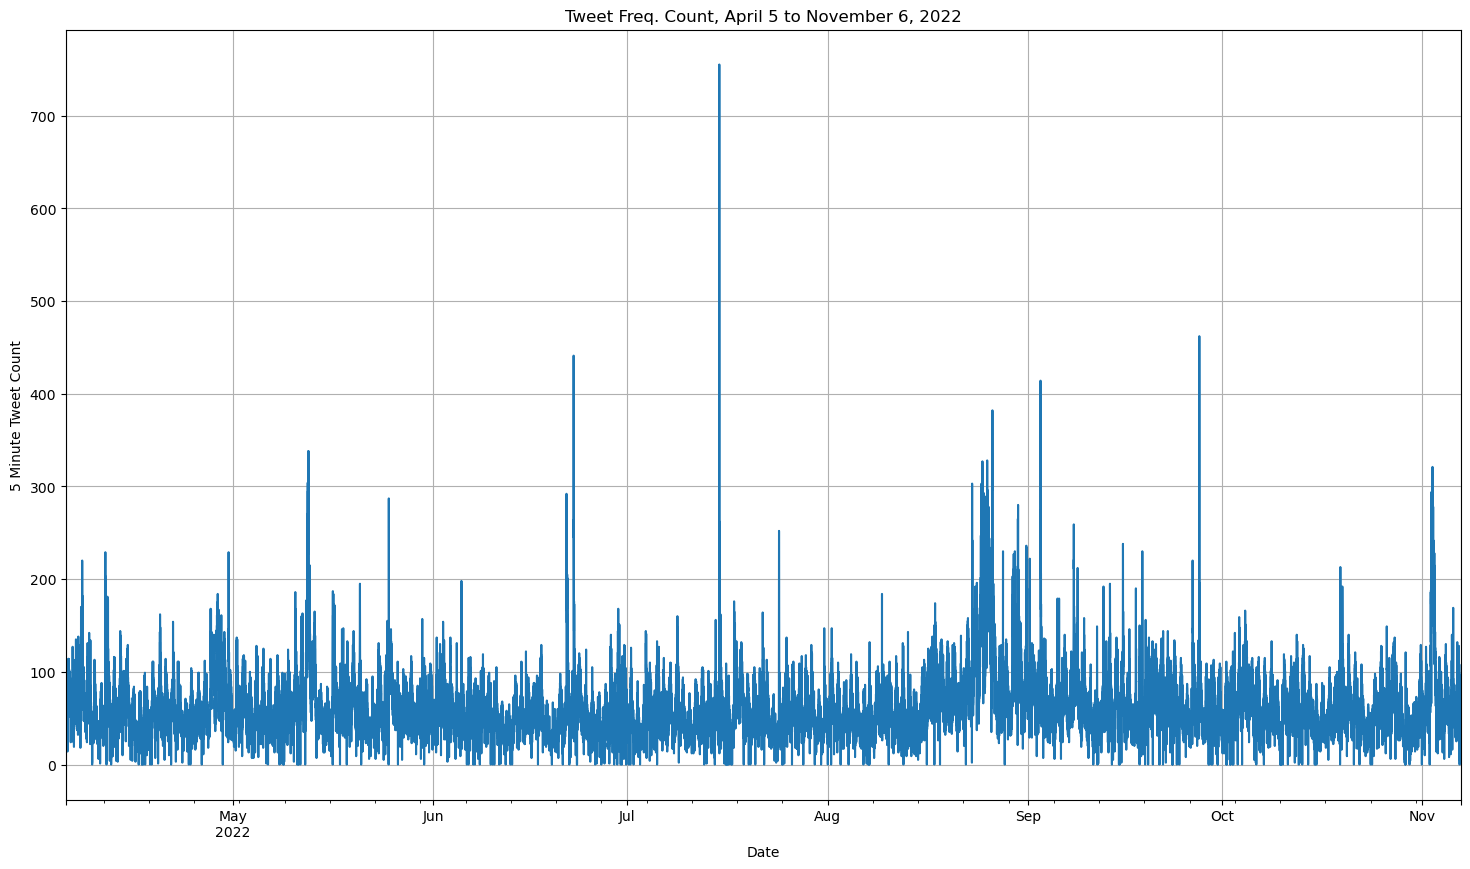

In [13]:
tweet_df_5min.plot(figsize=(18,10))
plt.ylabel('5 Minute Tweet Count')
plt.xlabel('Date')
plt.title('Tweet Freq. Count, April 5 to November 6, 2022')
plt.grid(True)
#https://cvw.cac.cornell.edu/PyDataSci1/tweets_retweets
#for explaination of 5 min intervals

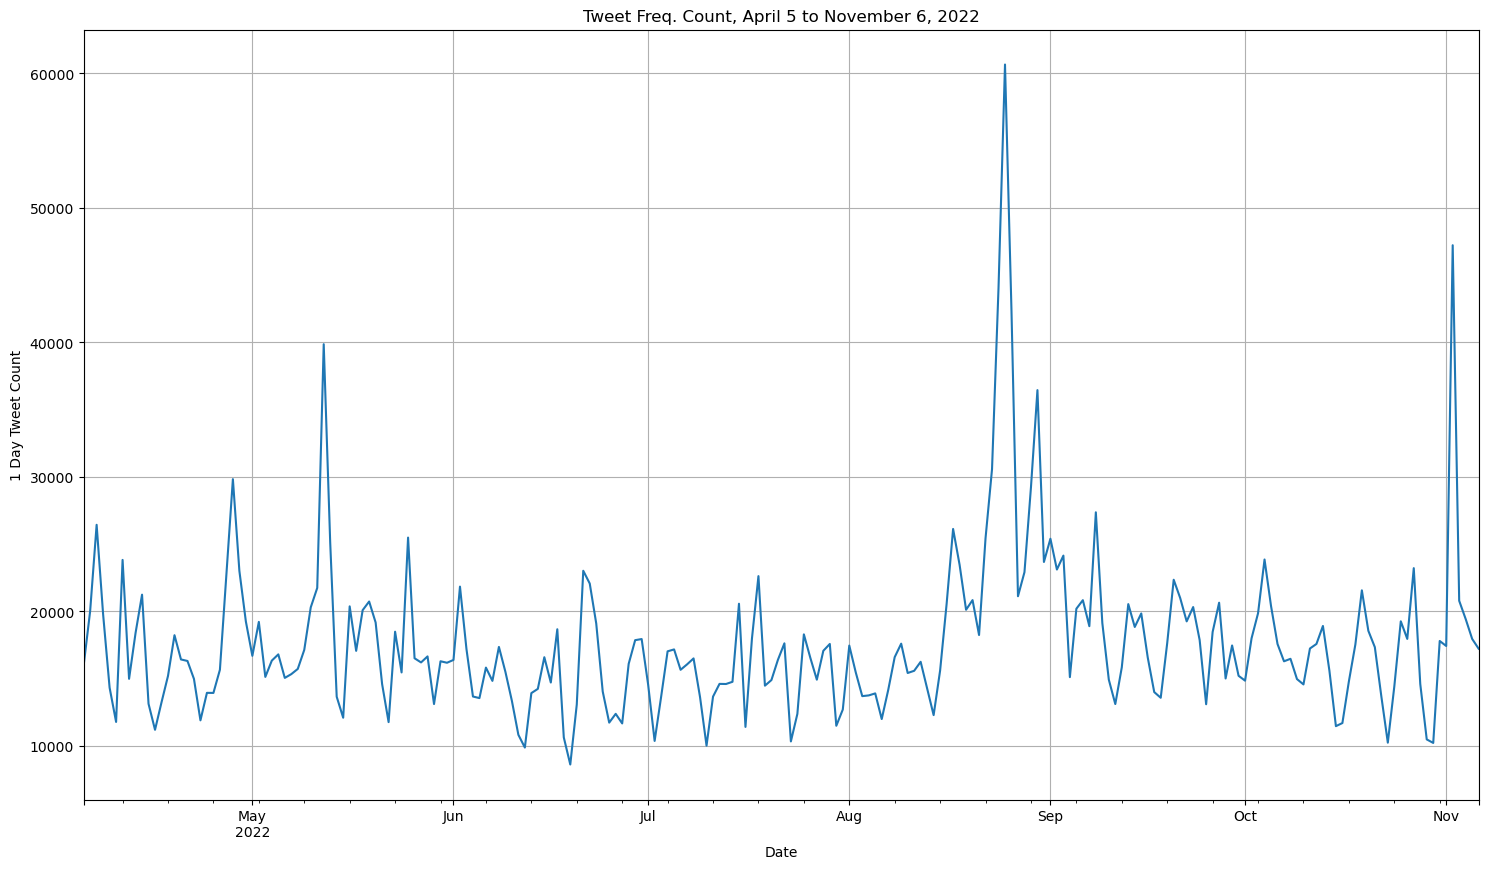

In [18]:
tweet_df_1day.plot(figsize=(18,10))
plt.ylabel('1 Day Tweet Count')
plt.xlabel('Date')
plt.title('Tweet Freq. Count, April 5 to November 6, 2022')
plt.grid(True)
#https://cvw.cac.cornell.edu/PyDataSci1/tweets_retweets


In [14]:
tweet_df_5min.sort_values(ascending=False)
#df.loc['2014-01-01':'2014-02-01']


date
2022-07-15 05:55:00    755
2022-09-27 11:50:00    462
2022-06-22 17:05:00    441
2022-07-15 06:00:00    437
2022-09-02 22:20:00    414
                      ... 
2022-04-21 10:35:00      0
2022-09-30 08:30:00      0
2022-09-30 08:05:00      0
2022-04-16 23:20:00      0
2022-07-30 00:15:00      0
Length: 62143, dtype: int64

In [19]:
tweet_df_1day.sort_values(ascending=False)

date
2022-08-25    60650
2022-11-02    47214
2022-08-24    44030
2022-08-26    42316
2022-05-12    39856
              ...  
2022-10-23    10228
2022-10-30    10208
2022-07-10    10004
2022-06-12     9864
2022-06-19     8603
Length: 216, dtype: int64

#### We're interested in how tweets and retweets unfold over time. Since each tweet is tweeted at a particular instant in time, it is useful to bundle tweets into regular time bins, for example, 5 minute or 1 day epochs. We can accomplish this using the pandas groupby method on our tweet dataframe. Instead of grouping on identical key values as we did in an earlier section, we can use a pandas Grouper object to group timestamps into bins at the desired frequency and count up the number of entries in each bin, using the .size() aggregator function. Then we can plot the timeline.



#### We can clearly see a daily cycle of increasing and decreasing activity over the two-week period. We can also see that activity can vary significantly from day to day, with sharp spikes of activity occuring on occasion.
